In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#LIBRARY

In [ ]:
import numpy as np
import pandas as pd

#Pra Pengolahan

## GET the data
## Memuat Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Bantuan/DEA/train.csv', delimiter=';')
df_mv = df.replace(np.nan, -1)

## EXPLORE the data
## Menampilkan lima data pertama

In [ ]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [ ]:
df_mv.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,-1.0000,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,-1.000000,0.598039,-1.000000,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,-1.000000,0.084507,-1.000000,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,-1.000000,3,2,3,3,0.304348,-1.000000,0.225352,-1.000000,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,-1.000000,3,2,3,3,0.420290,-1.000000,0.352113,-1.000000,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,-1.000000,3,2,3,2,0.463768,-1.000000,0.408451,-1.000000,-1.0,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


## Menampilkan info data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [ ]:
df_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


## Mengecek missing values

In [ ]:
df.isnull().any()

Id                    False
Product_Info_1        False
Product_Info_2        False
Product_Info_3        False
Product_Info_4        False
                      ...  
Medical_Keyword_45    False
Medical_Keyword_46    False
Medical_Keyword_47    False
Medical_Keyword_48    False
Response              False
Length: 128, dtype: bool

In [ ]:
df_mv.isnull().any()

Id                    False
Product_Info_1        False
Product_Info_2        False
Product_Info_3        False
Product_Info_4        False
                      ...  
Medical_Keyword_45    False
Medical_Keyword_46    False
Medical_Keyword_47    False
Medical_Keyword_48    False
Response              False
Length: 128, dtype: bool

## Menampilakan Persentase Missing Values

In [ ]:
df[df.columns[df.isnull().any()]].isnull().sum()/len(df) * 100

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_3          57.663226
Family_Hist_4          32.306630
Family_Hist_5          70.411411
Medical_History_1      14.969435
Medical_History_10     99.061990
Medical_History_15     75.101463
Medical_History_24     93.598963
Medical_History_32     98.135767
dtype: float64

In [ ]:
df_mv[df_mv.columns[df_mv.isnull().any()]].isnull().sum()/len(df_mv) * 100

Series([], dtype: float64)

## Mengecek Imbalanced Data

In [ ]:
df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [ ]:
df_mv['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

## Deskripsi Data

In [ ]:
print(df.describe())

                 Id  Product_Info_1  ...  Medical_Keyword_48      Response
count  59381.000000    59381.000000  ...        59381.000000  59381.000000
mean   39507.211515        1.026355  ...            0.054496      5.636837
std    22815.883089        0.160191  ...            0.226995      2.456833
min        2.000000        1.000000  ...            0.000000      1.000000
25%    19780.000000        1.000000  ...            0.000000      4.000000
50%    39487.000000        1.000000  ...            0.000000      6.000000
75%    59211.000000        1.000000  ...            0.000000      8.000000
max    79146.000000        2.000000  ...            1.000000      8.000000

[8 rows x 127 columns]


In [ ]:
print(df_mv.describe())

                 Id  Product_Info_1  ...  Medical_Keyword_48      Response
count  59381.000000    59381.000000  ...        59381.000000  59381.000000
mean   39507.211515        1.026355  ...            0.054496      5.636837
std    22815.883089        0.160191  ...            0.226995      2.456833
min        2.000000        1.000000  ...            0.000000      1.000000
25%    19780.000000        1.000000  ...            0.000000      4.000000
50%    39487.000000        1.000000  ...            0.000000      6.000000
75%    59211.000000        1.000000  ...            0.000000      8.000000
max    79146.000000        2.000000  ...            1.000000      8.000000

[8 rows x 127 columns]


##Mengubah variabel kategorik (Product Info 2)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Product_Info_2'])
df['Product_Info_2'] = le.transform(df['Product_Info_2'])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_mv['Product_Info_2'])
df_mv['Product_Info_2'] = le.transform(df_mv['Product_Info_2'])

##Membuat Data dan Labels

In [ ]:
labels = df[['Id', 'Response']].set_index('Id')
data = df.drop(['Response'], axis=1).set_index('Id')
#data.info()

In [ ]:
data_knn = data

In [ ]:
labels_mv = df_mv[['Id', 'Response']].set_index('Id')
data_mv = df_mv.drop(['Response'], axis=1).set_index('Id')
#data.info()

In [ ]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_mv.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,-1.0000,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,-1.000000,0.598039,-1.000000,0.526786,4.0,112,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,-1.000000,0.084507,-1.000000,5.0,412,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,-1.000000,3,2,3,3,0.304348,-1.000000,0.225352,-1.000000,10.0,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,-1.000000,3,2,3,3,0.420290,-1.000000,0.352113,-1.000000,0.0,350,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,-1.000000,3,2,3,2,0.463768,-1.000000,0.408451,-1.000000,-1.0,162,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Pra pengolahan pada data yang akan diimputasi

##Imputasi MEAN

##Imputasi Pada data awal

In [ ]:
from sklearn.impute import SimpleImputer

miss_columns = data.columns[data.isnull().any()]
imp = SimpleImputer(strategy='mean')
data[miss_columns] = imp.fit_transform(data[miss_columns])

##Standarisasi dan OHE

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cont_columns = [name for name in data.columns
                       if data[name].dtype == np.float64]
cat_columns = [name for name in data.columns
                       if data[name].dtype == np.int64 or data[name].dtype == np.object]

std = ColumnTransformer(
    [('cont_preprocessing', StandardScaler(), cont_columns),
     ('cat_preprocessing', OneHotEncoder(categories='auto'), cat_columns)],
    remainder='passthrough')


data_standar= std.fit_transform(data)
data_standar.shape

(59381, 943)

##Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
data_ros, labels_ros = ros.fit_resample(data_standar, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

##Imputasi KNN

In [ ]:
from sklearn.impute import KNNImputer

miss_columns = data.columns[data.isnull().any()]
imp = KNNImputer(n_neighbors=5)

data_knn[miss_columns] = imp.fit_transform(data_knn[miss_columns])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cont_columns = [name for name in data_knn.columns
                       if data_knn[name].dtype == np.float64]
cat_columns = [name for name in data_knn.columns
                       if data_knn[name].dtype == np.int64 or data_knn[name].dtype == np.object]

std = ColumnTransformer(
    [('cont_preprocessing', StandardScaler(), cont_columns),
     ('cat_preprocessing', OneHotEncoder(categories='auto'), cat_columns)],
    remainder='passthrough')


data_standar_knn= std.fit_transform(data_knn)
data_standar_knn.shape

(59381, 943)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
data_ros_knn, labels_ros_knn = ros.fit_resample(data_standar_knn, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#Pra Pengolahan untuk data tanpa imputasi

##Pra Pengolahan : OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
data_ros_mv, labels_ros_mv = ros.fit_resample(data_mv, labels_mv)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##Mengembalikan -1 ke Nan

In [ ]:
for i in range(len(data_ros_mv[:])):
  for j in range(len(data_ros_mv[0][:])):
    if data_ros_mv[i][j]==-1:
      data_ros_mv[i][j]=np.nan

In [ ]:
data_ros_mv[0]

array([1.00000000e+00, 1.60000000e+01, 1.00000000e+01, 7.69230770e-02,
       2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 6.41791045e-01,
       5.81818182e-01, 1.48535565e-01, 3.23007976e-01, 2.80000000e-02,
       1.20000000e+01, 1.00000000e+00, 0.00000000e+00, 3.00000000e+00,
                  nan, 1.00000000e+00, 2.00000000e+00, 6.00000000e+00,
       3.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.00000000e+00, 1.00000000e+00,
       6.66667000e-04, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
       2.00000000e+00,            nan, 5.98039216e-01,            nan,
       5.26785714e-01, 4.00000000e+00, 1.12000000e+02, 2.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.00000000e+00, 2.00000000e+00,
       2.00000000e+00, 1.00000000e+00,            nan, 3.00000000e+00,
       2.00000000e+00, 3.00000000e+00, 3.00000000e+00, 2.40000000e+02,
       3.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [ ]:
lis_kolom = data_mv.columns
lis_kolom

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=126)

In [ ]:
data_ros2_mv = pd.DataFrame(data = data_ros_mv, columns = lis_kolom)
data_ros2_mv.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1.0,16.0,10.0,0.076923,2.0,1.0,1.0,0.641791,0.581818,0.148536,0.323008,0.028,12.0,1.0,0.0,3.0,NaN,1.0,2.0,6.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,0.000667,1.0,1.0,2.0,2.0,NaN,0.598039,NaN,0.526786,4.0,112.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,26.0,0.076923,2.0,3.0,1.0,0.059701,0.600000,0.131799,0.272288,0.000,1.0,3.0,0.0,2.0,0.0018,1.0,2.0,6.0,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.000133,1.0,3.0,2.0,2.0,0.188406,NaN,0.084507,NaN,5.0,412.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,18.0,26.0,0.076923,2.0,3.0,1.0,0.029851,0.745455,0.288703,0.428780,0.030,9.0,1.0,0.0,2.0,0.0300,1.0,2.0,8.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,NaN,3.0,2.0,3.0,3.0,0.304348,NaN,0.225352,NaN,10.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,17.0,10.0,0.487179,2.0,3.0,1.0,0.164179,0.672727,0.205021,0.352438,0.042,9.0,1.0,0.0,3.0,0.2000,2.0,2.0,8.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,NaN,3.0,2.0,3.0,3.0,0.420290,NaN,0.352113,NaN,0.0,350.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,15.0,26.0,0.230769,2.0,3.0,1.0,0.417910,0.654545,0.234310,0.424046,0.027,9.0,1.0,0.0,2.0,0.0500,1.0,2.0,6.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,NaN,3.0,2.0,3.0,2.0,0.463768,NaN,0.408451,NaN,NaN,162.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Pra Pengolahan: Standarisasi dan OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cont_columns = [name for name in data_mv.columns
                       if data_mv[name].dtype == np.float64]
cat_columns = [name for name in data_mv.columns
                       if data_mv[name].dtype == np.int64 or data_mv[name].dtype == np.object]

std = ColumnTransformer(
    [('cont_preprocessing', StandardScaler(), cont_columns),
     ('cat_preprocessing', OneHotEncoder(categories='auto'), cat_columns)],
    remainder='passthrough')


data_standar_mv = std.fit_transform(data_ros2_mv)
data_standar_mv.shape

(155912, 943)

#LIBRARY XGBOOST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import seaborn as sb

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score  

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

import xgboost as xgb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


##Optimasi Parameter XGBOOST Oversampling

XGBoost with mean imputation: 0.934688 (0.000228)
list cv [0.9345156  0.93483629 0.93499455 0.93473799 0.93435315]
XGBoost with KNN imputation: 0.932879 (0.001297)
list cv [0.93320078 0.93490043 0.93335899 0.9314348  0.93149894]
XGBoost without imputation: 0.935040 (0.000565)
list cv [0.93550973 0.93576628 0.93512283 0.9345135  0.93428901]


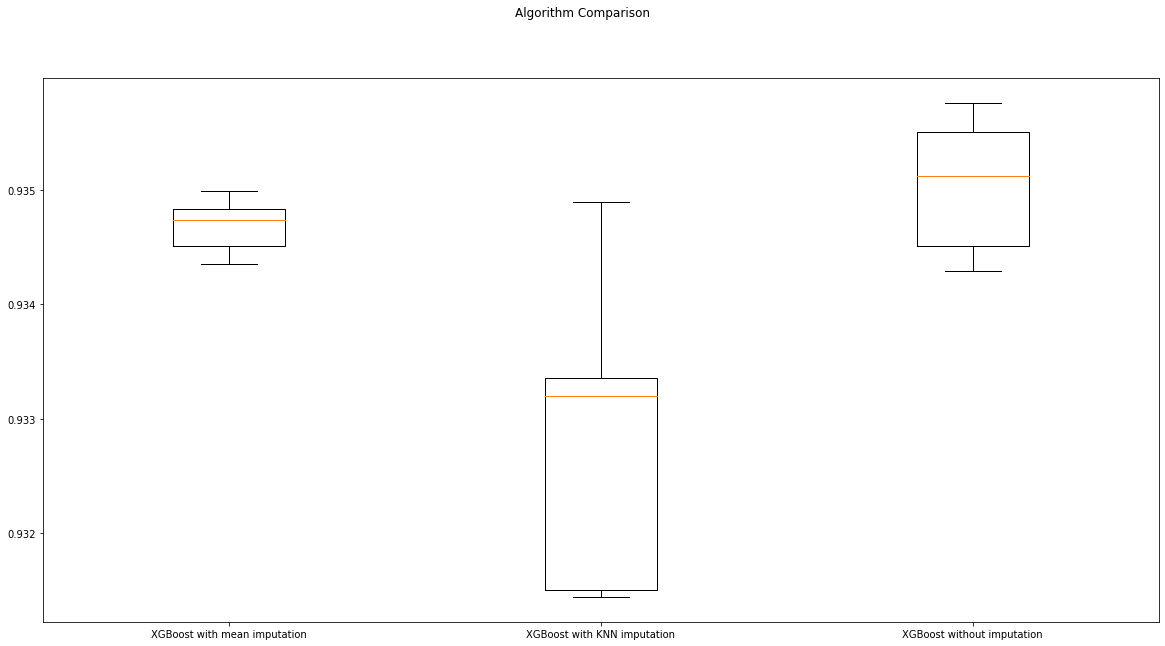

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

model_mv = xgb.XGBClassifier(max_depth = 24, min_child_weight = 0, subsample = 0.8, colsample_bytree = 0.9, learning_rate = 0.2, tree_method = 'gpu_hist', alpha = 0, reg_lambda = 0)
model = xgb.XGBClassifier(max_depth = 24, min_child_weight = 0, subsample = 0.8, colsample_bytree = 0.8, learning_rate = 0.1, tree_method = 'gpu_hist', alpha = 0, reg_lambda = 0)
models = [('XGBoost with mean imputation', model),('XGBoost with KNN imputation', model), ('XGBoost without imputation', model_mv)]
check_data = [data_ros, data_ros_knn, data_standar_mv]
check_labels = [labels_ros, labels_ros_knn, labels_ros_mv]
results =[]
names = []
for i in range(len(models)):
  kfold = KFold(n_splits=5, shuffle = True, random_state = 42)
  cv_results = cross_val_score(models[i][1], check_data[i], check_labels[i], cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(models[i][0])
  msg = "%s: %f (%f)" % (models[i][0], cv_results.mean(), cv_results.std())
  print(msg)
  print("list cv", cv_results)

#Menampilkan Boxplot 
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Menampilkan Confusion matrix

##Fit ulang model

In [ ]:
from sklearn.externals import joblib

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_ros, labels_ros, test_size = 0.2, random_state = 42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(data_ros_knn, labels_ros_knn, test_size = 0.2, random_state = 42)
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(data_standar_mv, labels_ros_mv, test_size = 0.2, random_state = 42)

In [ ]:
XGBoost = xgb.XGBClassifier(max_depth = 24, min_child_weight = 0, subsample = 0.8, colsample_bytree = 0.8, learning_rate = 0.1, tree_method = 'gpu_hist', alpha = 0, reg_lambda = 0).fit(X_train,y_train)
joblib.dump(XGBoost,'/content/drive/My Drive/Bantuan/DEA/XGBoost_mean.joblib')

['/content/drive/My Drive/Bantuan/DEA/XGBoost_mean.joblib']

In [ ]:
XGBoost_knn = xgb.XGBClassifier(max_depth = 24, min_child_weight = 0, subsample = 0.8, colsample_bytree = 0.8, learning_rate = 0.1, tree_method = 'gpu_hist', alpha = 0, reg_lambda = 0).fit(X_train_knn,y_train_knn)
joblib.dump(XGBoost_knn,'/content/drive/My Drive/Bantuan/DEA/XGBoost_KNN.joblib')

['/content/drive/My Drive/Bantuan/DEA/XGBoost_KNN.joblib']

In [ ]:
XGBoost_mv = xgb.XGBClassifier(max_depth = 24, min_child_weight = 0, subsample = 0.8, colsample_bytree = 0.9, learning_rate = 0.2, tree_method = 'gpu_hist', alpha = 0, reg_lambda = 0).fit(X_train_mv, y_train_mv)
joblib.dump(XGBoost,'/content/drive/My Drive/Bantuan/DEA/XGBoost_mv.joblib')

['/content/drive/My Drive/Bantuan/DEA/XGBoost_mv.joblib']

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(XGBoost.predict(X_test),y_test))
print(confusion_matrix(XGBoost.predict(X_test),y_test))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95      3809
           2       0.93      0.96      0.94      3854
           3       1.00      1.00      1.00      3899
           4       1.00      0.99      1.00      3935
           5       0.97      0.97      0.97      4041
           6       0.83      0.89      0.86      3619
           7       0.92      0.87      0.89      4097
           8       0.89      0.84      0.86      3929

    accuracy                           0.93     31183
   macro avg       0.93      0.93      0.93     31183
weighted avg       0.94      0.93      0.93     31183

[[3686   42    0    0    4   48   12   17]
 [  56 3698    0    0   11   61    6   22]
 [   7    9 3880    0    0    3    0    0]
 [   6   18    0 3907    0    3    0    1]
 [  21   45    0    0 3906   61    2    6]
 [  69   72    0    0   51 3223   82  122]
 [  49   35    0    0   14  210 3552  237]
 [  78   64    0    0   25  256  207 3299]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(XGBoost_knn.predict(X_test_knn),y_test_knn))
print(confusion_matrix(XGBoost_knn.predict(X_test_knn),y_test_knn))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95      3821
           2       0.93      0.96      0.94      3844
           3       1.00      1.00      1.00      3895
           4       1.00      0.99      1.00      3944
           5       0.97      0.96      0.97      4064
           6       0.82      0.87      0.84      3641
           7       0.91      0.88      0.90      3984
           8       0.89      0.83      0.86      3990

    accuracy                           0.93     31183
   macro avg       0.93      0.93      0.93     31183
weighted avg       0.93      0.93      0.93     31183

[[3688   38    0    0   10   54    9   22]
 [  47 3697    0    0   12   67    9   12]
 [   6    8 3880    0    0    1    0    0]
 [   9   22    0 3907    0    5    0    1]
 [  37   52    0    0 3898   73    1    3]
 [  75   68    0    0   51 3164  104  179]
 [  33   28    0    0   15  206 3513  189]
 [  77   70    0    0   25  295  225 3298]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(XGBoost_mv.predict(X_test_mv),y_test_mv))
print(confusion_matrix(XGBoost_mv.predict(X_test_mv),y_test_mv))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95      3829
           2       0.93      0.97      0.95      3827
           3       1.00      1.00      1.00      3895
           4       1.00      0.99      1.00      3936
           5       0.97      0.97      0.97      4038
           6       0.83      0.88      0.86      3648
           7       0.91      0.88      0.90      3991
           8       0.90      0.83      0.87      4019

    accuracy                           0.94     31183
   macro avg       0.94      0.94      0.93     31183
weighted avg       0.94      0.94      0.94     31183

[[3701   39    0    0    7   47   16   19]
 [  42 3704    0    0   13   48   12    8]
 [   6    7 3880    0    0    2    0    0]
 [   7   19    0 3907    0    2    0    1]
 [  27   45    0    0 3901   59    2    4]
 [  79   74    0    0   54 3217   98  126]
 [  41   27    0    0   11  197 3516  199]
 [  69   68    0    0   25  293  217 3347]]
